### [logistic.py](https://github.com/elavallee-github/elavallee-github.github.io/blob/5d61e8c6617aa6005629d9eb87295abbd131a206/posts/logistic-blog/logistic.py)

### Abstract

The goal of this blog post is to investigate an implementation of a logistic regression model. By running different datasets through the main training loop found later in this blog post we can investigate how a logistic regression model performs at classifying data and how the classification speed can be increased through a technique called momentum. We can also explore how the model performs when the dataset has more features than there are data points.

### Part A: Implement Logistic Regression

In [15]:
%load_ext autoreload
%autoreload 2
from logistic import LogisticRegression, GradientDescentOptimizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


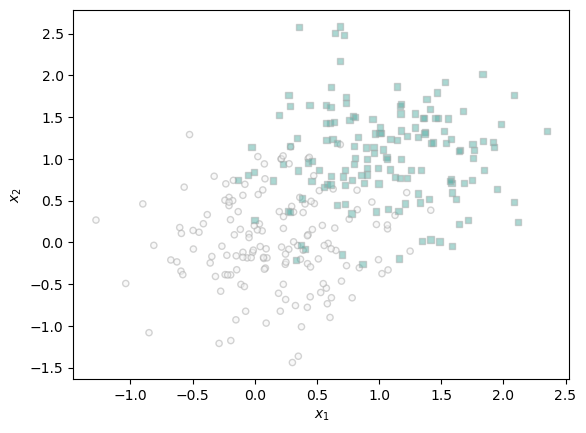

In [16]:
import torch
from matplotlib import pyplot as plt
def classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y

def plot_classification_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [0, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = y[ix], facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

fig, ax = plt.subplots(1, 1)
X, y = classification_data(noise = 0.5)
plot_classification_data(X, y, ax)

#### Visualization Code
Taken from live notes by Professor Chodrow

In [17]:
def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 101)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x, y, **kwargs)

#### Main Training Loop

The following code will be used to streamline testing of different learning rates and how momentum affects the efficiency of logistic regression model training. One plot will be produced to visualize the dividing line in the data and another plot will be used to visualize the loss value over the iterations.

In [18]:
def train_LR(X, y, alpha, beta, max_iters):
    LR = LogisticRegression() 
    opt = GradientDescentOptimizer(LR)

    loss = 1
    loss_vec = []
    weights = []
    w_prev = None

    for _ in range(max_iters):
        # add other stuff to e.g. keep track of the loss over time. 
        loss = LR.loss(X,y)
        loss_vec.append(loss)
        if w_prev == None:
            w_prev = LR.w
        w = LR.w
        weights.append(w)
        opt.step(X, y, alpha = alpha, beta = beta, w_prev=w_prev)
        w_prev = w

    return LR.w, loss_vec

    fig, ax = plt.subplots(1, 2, figsize=(10,5))
    plot_classification_data(X, y, ax[0])
    draw_line(LR.w, -1, 2, ax[0], color = "black")
    ax[1].plot(loss_vec, color = "slategrey")
    ax[1].scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
    labs = plt.gca().set(xlabel = "Logistic Regression Iteration (Updates Only)", ylabel = "loss")
    

Text(0.5, 1.0, 'Logistic Regression Loss with Momentum')

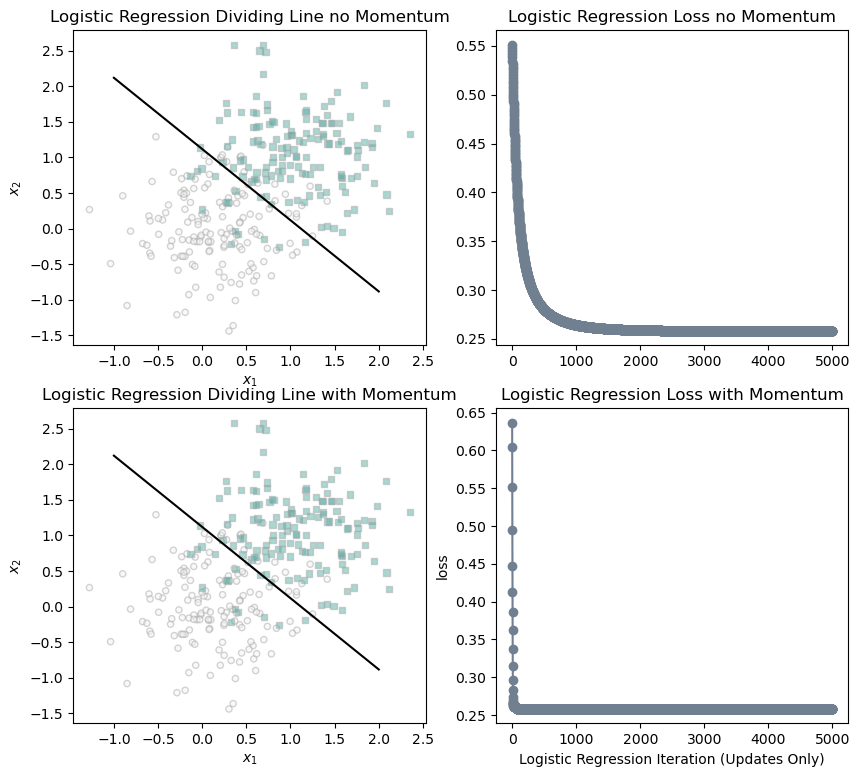

In [29]:
w_nm, loss_vec_nm = train_LR(X, y, alpha=0.1, beta=0.0, max_iters=5000)
w_wm, loss_vec_wm = train_LR(X, y, alpha=0.5, beta=0.9, max_iters=5000)


fig, ax = plt.subplots(2, 2, figsize=(10,9))
plot_classification_data(X, y, ax[0,0])
plot_classification_data(X, y, ax[1,0])
draw_line(w_nm, -1, 2, ax[0,0], color = "black")
draw_line(w_wm, -1, 2, ax[1,0], color = "black")
ax[0,1].plot(loss_vec_nm, color = "slategrey")
ax[0,1].scatter(torch.arange(len(loss_vec_nm)), loss_vec_nm, color = "slategrey")
ax[1,1].plot(loss_vec_wm, color = "slategrey")
ax[1,1].scatter(torch.arange(len(loss_vec_wm)), loss_vec_wm, color = "slategrey")
labs = plt.gca().set(xlabel = "Logistic Regression Iteration (Updates Only)", ylabel = "loss")
ax[0,0].set_title("Logistic Regression Dividing Line no Momentum")
ax[1,0].set_title("Logistic Regression Dividing Line with Momentum")

ax[0,1].set_title("Logistic Regression Loss no Momentum")
ax[1,1].set_title("Logistic Regression Loss with Momentum")

Plot 1: (a) Logistic Regression training using a learning rate of 0.1 and without momentum
        (b) Logistic Regression results using a learning rate of 0.5 and a momentum with a beta value of 0.9

Looking at the above plots (plots 1a and 1b) we can see that visually my implementation of the logistic regression model is correct in that both plots have a dividing line that seemingly divides the data correctly between the two groups. We also see a trend we were hoping to observe where when we use momentum we see a decrease in the number of iterations it takes for us to find that dividing line and level out in our loss calculations.

### Training Models with Dimensions Larger than their Points

In [9]:
X_train, y_train = classification_data(n_points = 50, noise = 0.5, p_dims = 100)
X_test, y_test = classification_data(n_points = 50, noise = 0.5, p_dims = 100)

Below we are training a logistic regression model on our `X_train` and `y_train` data points

In [10]:
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

loss = 1
loss_vec = []
weights = []
w_prev = None

for _ in range(1000):
    # add other stuff to e.g. keep track of the loss over time. 
    loss = LR.loss(X_train,y_train)
    loss_vec.append(loss)
    if w_prev == None:
        w_prev = LR.w
    w = LR.w
    weights.append(w)
    opt.step(X_train, y_train, alpha = 0.5, beta = 0.9, w_prev=w_prev)
    w_prev = w

In [11]:
(1.0*(LR.predict(X_train)==y_train)).mean()

tensor(1.)

As we can see from the above output we have successfully trained a logistic regression model that has 100% prediction accuracy on the training data

In [12]:
(1.0*(LR.predict(X_test) == y_test)).mean()

tensor(1.)

Interestingly looking at the prediction accuracy on the testing data we can also see a prediction accuracy of 100% if our number of iterations in our training loop is large enough. This is really interesting as with a large amount of features we would expect to see overfitting but we don't in this case.

### Discussion

During this blog post we experimented on the prediction capabilities of my implementation of a logistic regression model. By running multiple datasets through the training loop I coded earlier in this blog we could see how the learning rate of a model as well as whether or not momentum is used affects a models classification abilities. From my experimenting we saw that by using a learning rate of `0.5` and a momentum learning rate of `0.9` we can decrease the number of training loop iterations it takes for a model to reach a low loss score. Without momentum it would take the model close to 1000 iterations to reach a loss score close to 0, however with the use of momentum we could decrease that to around 20 iterations. Additionally through my testing we saw that we could train a model to 100% prediction accuracy on its training data even if there are more features than there are data points. Impressively the model doesn't seem to fall victim to overfitting. When training on a dataset with more features than there are data points we reached a prediction accuracy of 100% on the training data and a prediction accuracy of 100% on the test accuracy meaning we saw no overfitting which is really cool to see. Overall it seems that a logistic regression model isn't the most complicated algorithm to implement and is efficient at reducing the number of iterations it takes for a model to be trained.